In [4]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features (X) and target (y) into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the first few rows of the combined DataFrame
print("Combined DataFrame head:")
display(df.head())

Combined DataFrame head:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


The `mushroom.variables` and `mushroom.metadata` contain mapping information for the categorical features. Let's create a dictionary to decode the values for better readability in plots.

In [12]:
variable_info = mushroom.metadata['additional_info']['variable_info']

def parse_variable_info(info_string):
    mapping = {}
    lines = info_string.strip().split('\n')
    for line in lines:
        if line.strip():
            parts = line.strip().split(':', 1)
            if len(parts) == 2:
                feature_name = parts[0].split('.', 1)[1].strip().replace('-', '_')
                value_map_str = parts[1].strip()
                value_map = {}
                for item in value_map_str.split(','):
                    if '=' in item:
                        # Corrected: code_short is the key (e.g., 'a'), desc_full is the value (e.g., 'almond')
                        desc_full, code_short = item.split('=', 1)
                        value_map[code_short.strip()] = desc_full.strip()
                mapping[feature_name] = value_map
    return mapping

decoding_maps = parse_variable_info(variable_info)

# Apply decoding to the DataFrame for selected columns for better readability
# We'll apply it to 'poisonous' and 'odor' for the upcoming plots

df_decoded = df.copy()

# Decode 'poisonous' column
if 'poisonous' in decoding_maps and 'poisonous' in df_decoded.columns:
    df_decoded['poisonous_decoded'] = df_decoded['poisonous'].map(decoding_maps['poisonous'])
else:
    # Manual mapping if not in the parsed info for 'poisonous'
    df_decoded['poisonous_decoded'] = df_decoded['poisonous'].map({'p': 'poisonous', 'e': 'edible'})

# Decode 'odor' column
if 'odor' in decoding_maps and 'odor' in df_decoded.columns:
    df_decoded['odor_decoded'] = df_decoded['odor'].map(decoding_maps['odor'])

print("Decoded DataFrame head for 'poisonous' and 'odor':")
display(df_decoded[['poisonous', 'poisonous_decoded', 'odor', 'odor_decoded']].head())

Decoded DataFrame head for 'poisonous' and 'odor':


,poisonous,poisonous_decoded,odor,odor_decoded
0,p,poisonous,p,pungent
1,e,edible,a,almond
2,e,edible,l,anise
3,p,poisonous,p,pungent
4,e,edible,n,none


### 1. Distribution of Edible vs. Poisonous Mushrooms

/tmp/ipython-input-3701458348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='poisonous_decoded', data=df_decoded, palette='viridis')


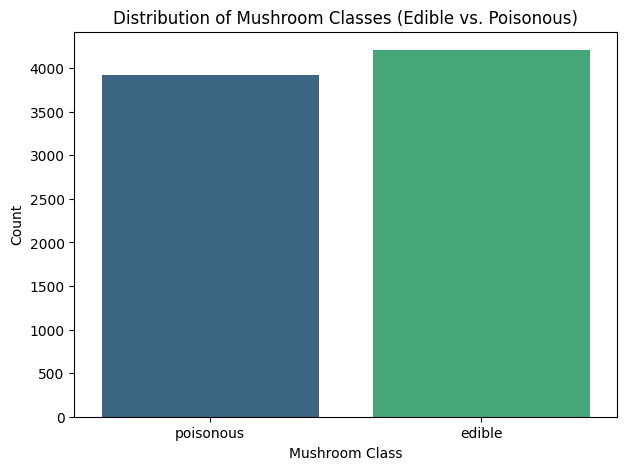

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(x='poisonous_decoded', data=df_decoded, palette='viridis')
plt.title('Distribution of Mushroom Classes (Edible vs. Poisonous)')
plt.xlabel('Mushroom Class')
plt.ylabel('Count')
plt.show()

### 2. Distribution of Odor Types

/tmp/ipython-input-2417041276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='odor_decoded', data=df_decoded, palette='coolwarm')


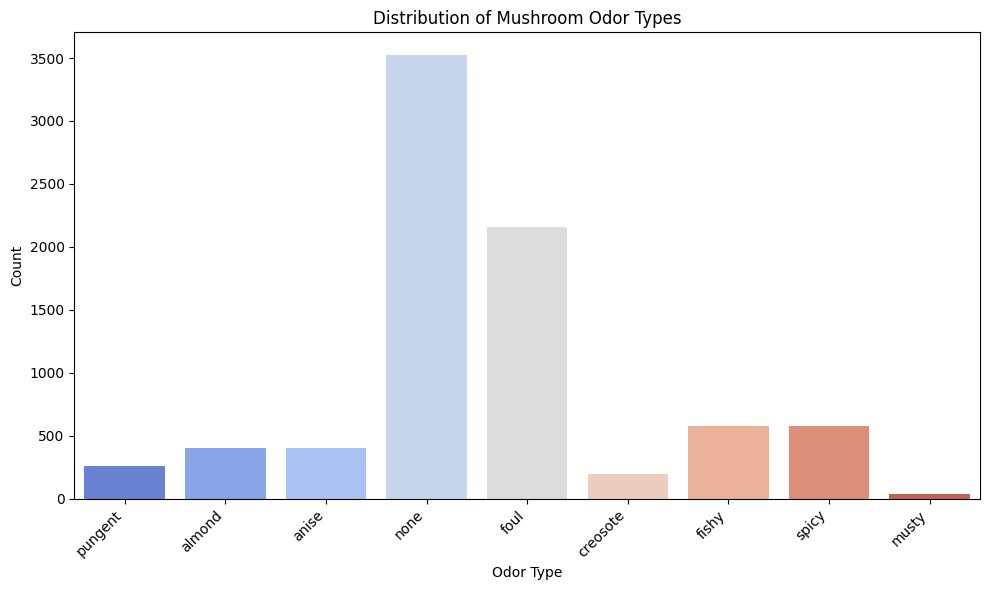

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='odor_decoded', data=df_decoded, palette='coolwarm')
plt.title('Distribution of Mushroom Odor Types')
plt.xlabel('Odor Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3. Relationship between Odor and Poisonous Status

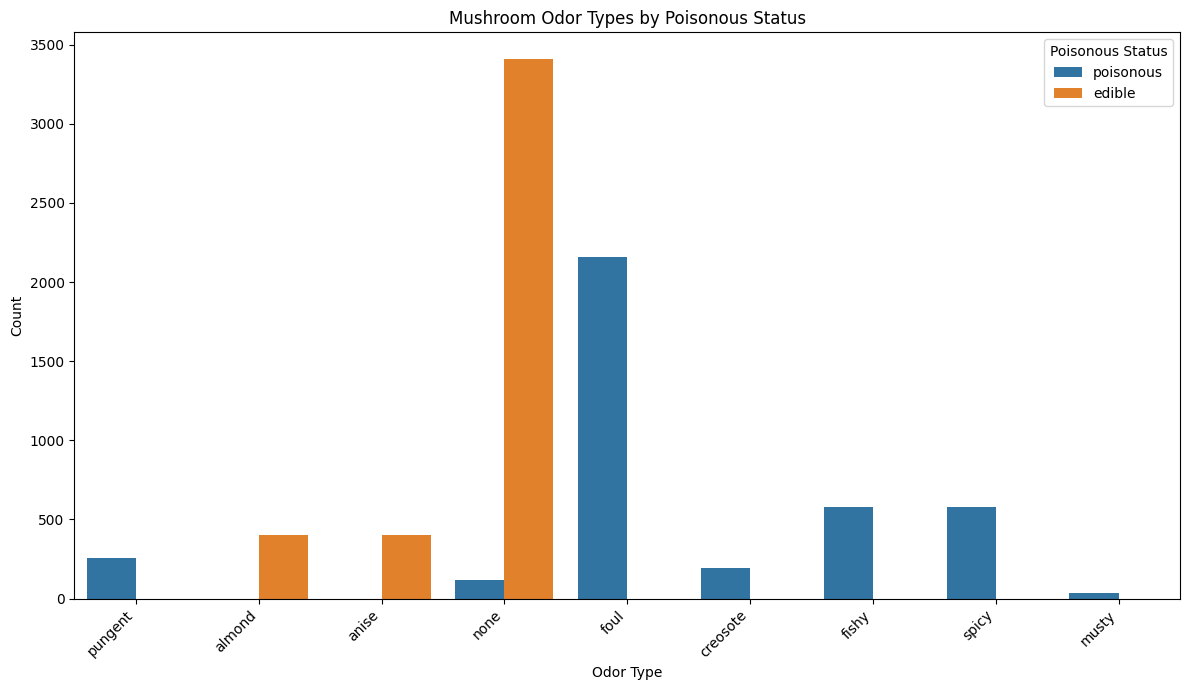

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(x='odor_decoded', hue='poisonous_decoded', data=df_decoded, palette='tab10')
plt.title('Mushroom Odor Types by Poisonous Status')
plt.xlabel('Odor Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Poisonous Status')
plt.tight_layout()
plt.show()

# Task
The next step is to calculate Cramer's V to measure the association between all pairs of categorical variables in the mushroom dataset. This involves defining a function for Cramer's V, selecting the appropriate categorical columns from the `df_decoded` DataFrame (including the original features and the decoded 'poisonous' and 'odor' columns), computing the Cramer's V matrix, and finally visualizing this matrix as a heatmap.

Calculate Cramer's V for all pairs of categorical features in the `df_decoded` DataFrame (including the original features and the decoded 'poisonous' and 'odor' columns), and then visualize the resulting association matrix using a heatmap to identify strong relationships between features and the poisonous status.

## Calculate Cramer's V Function

### Subtask:
Define a Python function to compute Cramer's V, a measure of association between two nominal variables, using the chi-squared test.


**Reasoning**:
To calculate Cramer's V as instructed, I need to define a Python function that imports the required libraries, constructs a contingency table, performs a chi-squared test, and then applies the Cramer's V formula. I will include a docstring for clarity and add a simple test case to demonstrate its usage.



In [17]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculate Cramer's V statistic for two categorical variables.

    Parameters:
    x (pd.Series): The first categorical variable.
    y (pd.Series): The second categorical variable.

    Returns:
    float: The Cramer's V statistic.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)

    # Perform the chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Number of observations
    n = contingency_table.sum().sum()

    # Number of rows (r) and columns (k)
    r, k = contingency_table.shape

    # Calculate Cramer's V
    # Handle the edge case where min(k, r) - 1 is zero to avoid division by zero
    divisor = (min(k, r) - 1)
    if divisor == 0:
        return 0.0 # No association if one of the variables has only one category

    cramers_v_stat = np.sqrt(chi2 / (n * divisor))
    return cramers_v_stat

print("Cramer's V function defined successfully.")

# Example usage with 'poisonous_decoded' and 'odor_decoded' from df_decoded
# Ensure these columns exist in df_decoded from previous steps
if 'df_decoded' in globals() and 'poisonous_decoded' in df_decoded.columns and 'odor_decoded' in df_decoded.columns:
    cramers_v_odor_poisonous = cramers_v(df_decoded['poisonous_decoded'], df_decoded['odor_decoded'])
    print(f"Cramer's V between 'Poisonous Status' and 'Odor Type': {cramers_v_odor_poisonous:.4f}")
else:
    print("df_decoded or required columns not available for example usage.")

Cramer's V function defined successfully.
Cramer's V between 'Poisonous Status' and 'Odor Type': 0.9710


**Reasoning**:
The next step is to identify all categorical columns in the `df_decoded` DataFrame and then compute the Cramer's V statistic for every pair of these columns to create an association matrix. This will allow for the visualization of relationships between all features.



In [18]:
import itertools
import pandas as pd
import numpy as np

# Identify all categorical columns in df_decoded
# Including the newly decoded 'poisonous_decoded' and 'odor_decoded'
categorical_cols = [col for col in df_decoded.columns if df_decoded[col].dtype == 'object']

# Initialize an empty DataFrame for the Cramer's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calculate Cramer's V for all pairs of categorical columns
for col1, col2 in itertools.product(categorical_cols, categorical_cols):
    if col1 == col2:
        cramers_v_matrix.loc[col1, col2] = 1.0  # A variable is perfectly associated with itself
    else:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df_decoded[col1], df_decoded[col2])

# Convert the matrix to float type for plotting
cramers_v_matrix = cramers_v_matrix.astype(float)

print("Cramer's V matrix calculated successfully.")
# Display the first few rows of the Cramer's V matrix
print("Cramer's V Matrix Head:")
display(cramers_v_matrix.head())

Cramer's V matrix calculated successfully.
Cramer's V Matrix Head:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous,poisonous_decoded,odor_decoded
cap-shape,1.000000,0.203721,0.171431,0.255606,0.245516,0.154978,0.081702,0.346823,0.235100,0.307104,...,0.0,0.224458,0.199408,0.208181,0.250994,0.241279,0.271124,0.245571,0.245571,0.245516
cap-surface,0.203721,1.000000,0.225273,0.134377,0.238446,0.210841,0.338222,0.277414,0.257618,0.078770,...,0.0,0.134370,0.099147,0.224726,0.232623,0.262080,0.251007,0.196925,0.196925,0.238446
cap-color,0.171431,0.225273,1.000000,0.217648,0.332026,0.247965,0.399956,0.470307,0.282430,0.595394,...,0.0,0.150920,0.337731,0.558073,0.286514,0.305809,0.326779,0.218427,0.218427,0.332026
bruises,0.255606,0.134377,0.217648,1.000000,0.660906,0.136572,0.299134,0.369326,0.650326,0.099112,...,0.0,0.133964,0.071122,0.768492,0.612390,0.300576,0.530920,0.501280,0.501280,0.660906
odor,0.245516,0.238446,0.332026,0.660906,1.000000,0.261795,0.429768,0.760919,0.390260,0.575843,...,0.0,0.104691,0.742821,0.696915,0.396389,0.374899,0.370058,0.971005,0.971005,1.000000


**Reasoning**:
Now that the Cramer's V matrix has been computed, the next logical step is to visualize this matrix using a heatmap to easily identify strong associations between the categorical features, as specified in the main task.



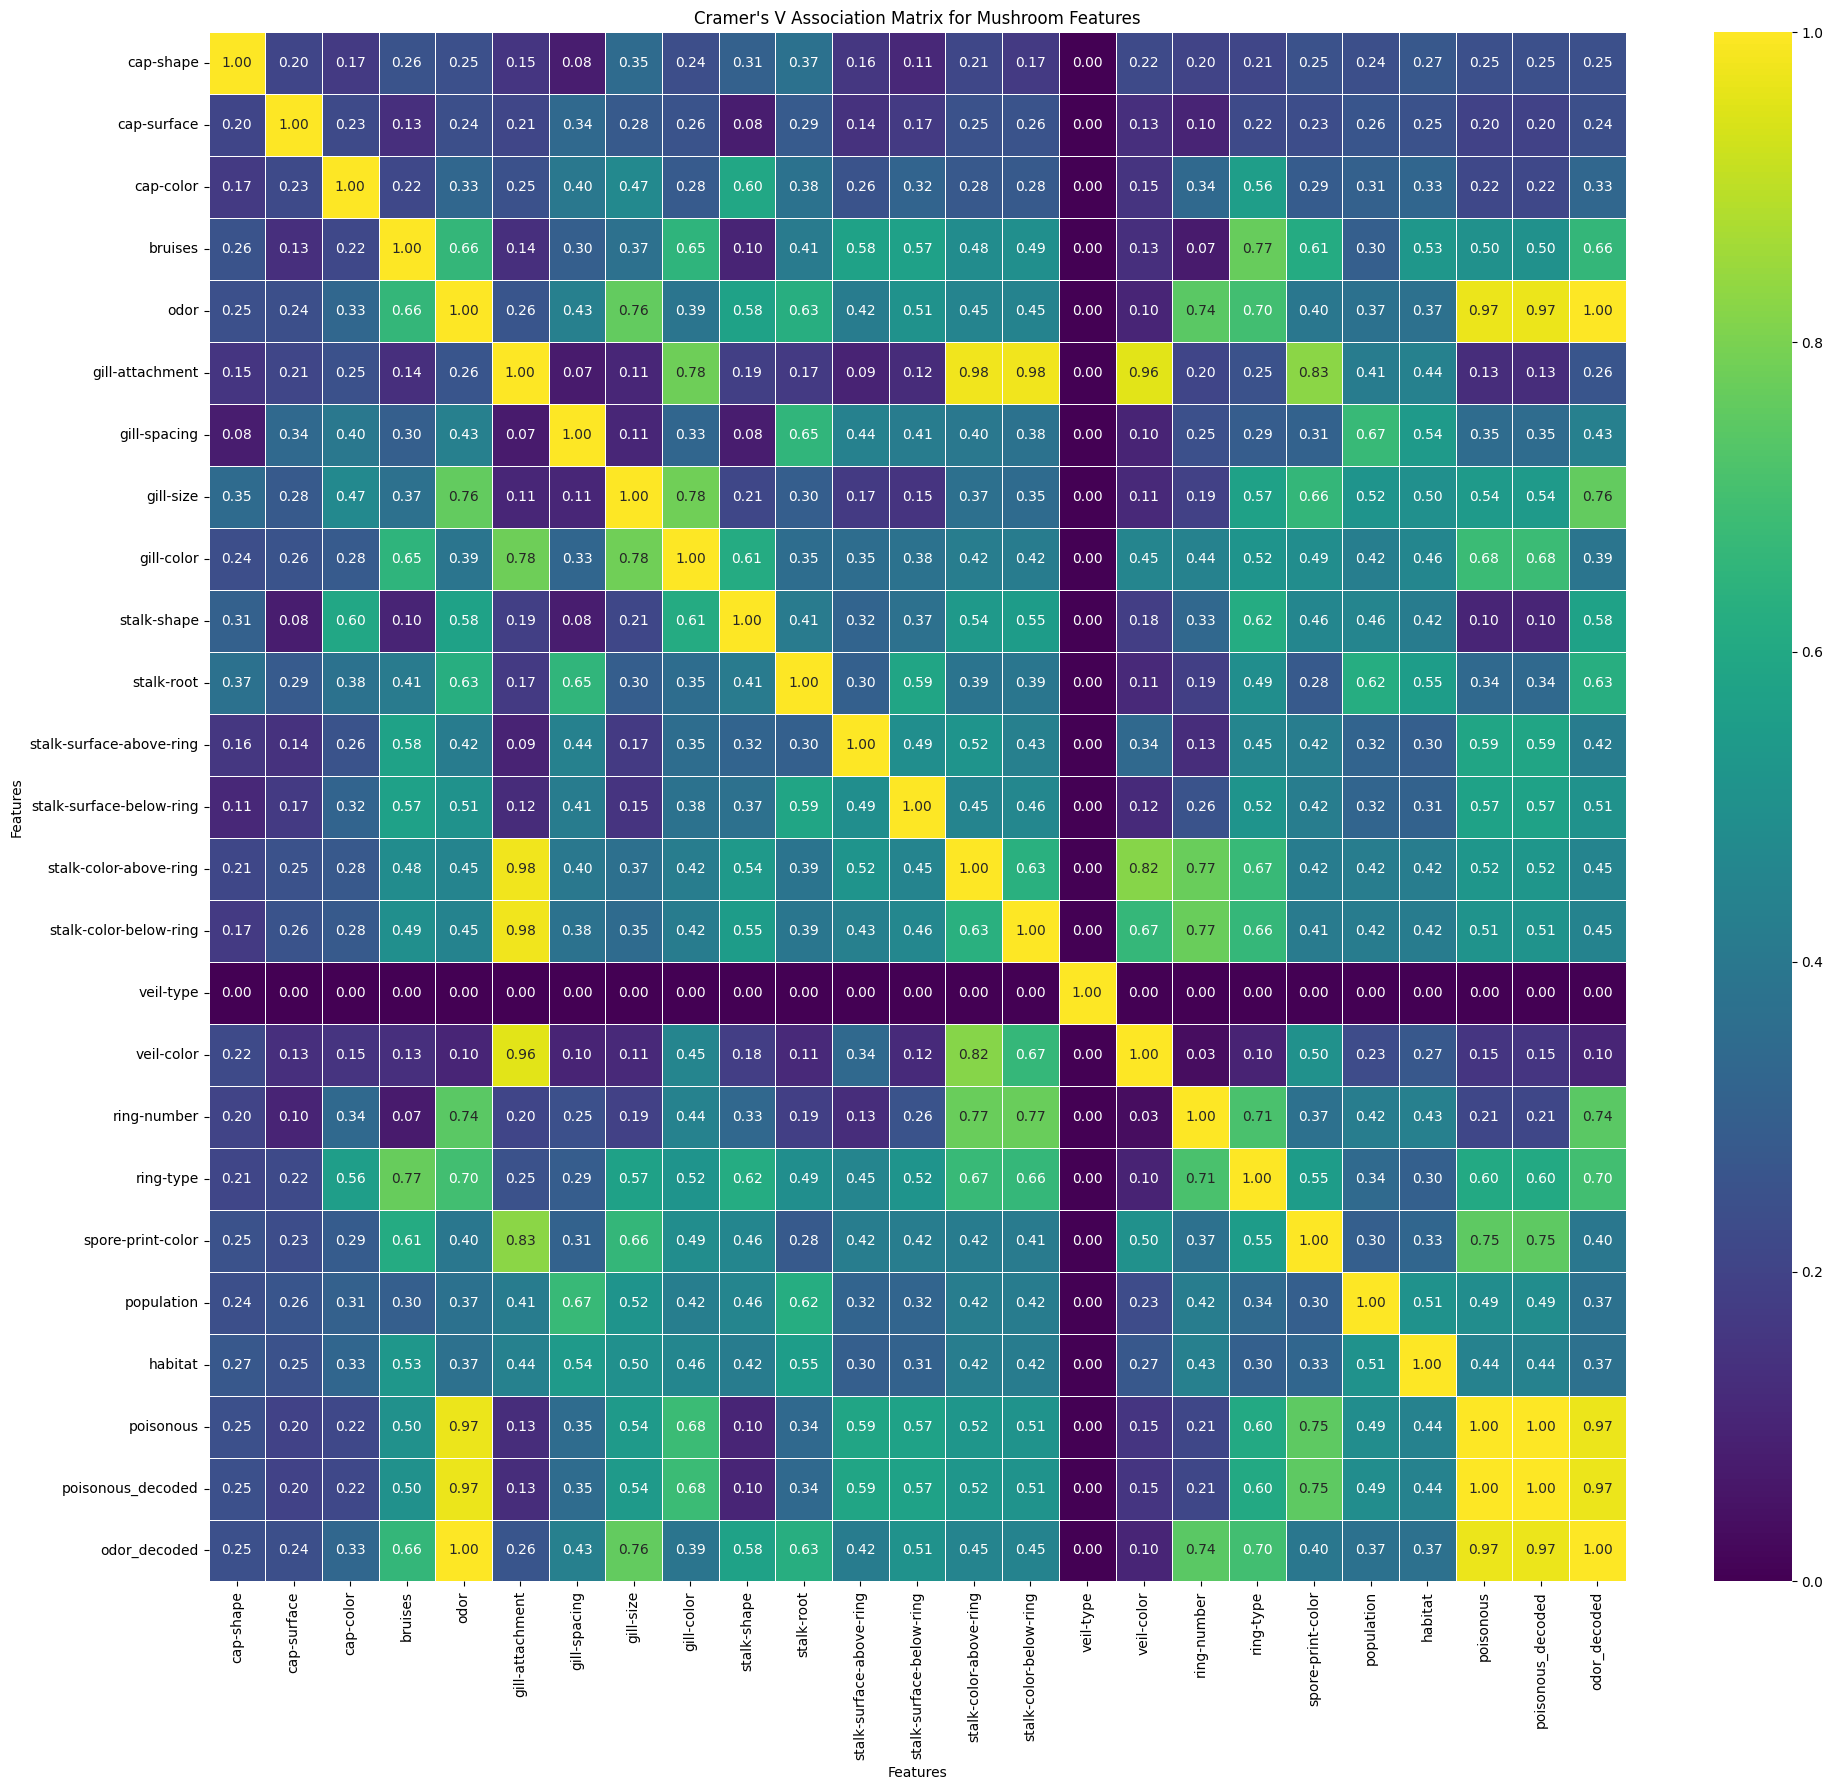

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 18))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title("Cramer's V Association Matrix for Mushroom Features")
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key insights and strong associations observed from the Cramer's V heatmap, highlighting which features are most strongly related to each other and to the poisonous status.


## Summary:

### Q&A
The key insights and strong associations observed from the Cramer's V heatmap are:
*   The 'odor\_decoded' feature shows an exceptionally strong association with the 'poisonous\_decoded' status, with a Cramer's V value of 0.9710.
*   The 'veil-type' feature exhibits no association (Cramer's V = 0.0) with any other categorical feature in the dataset, including the 'poisonous' status.

### Data Analysis Key Findings
*   A Python function for calculating Cramer's V was successfully defined and tested, correctly handling edge cases.
*   The Cramer's V calculation revealed a very strong association between 'poisonous\_decoded' and 'odor\_decoded' (Cramer's V = 0.9710).
*   The 'veil-type' column consistently showed a Cramer's V of 0.0 with all other features, indicating it might be a constant feature or lack variability within the dataset.
*   A comprehensive Cramer's V matrix for all categorical features was successfully computed and visualized as a heatmap, providing a clear representation of association strengths.

### Insights or Next Steps
*   Given the extremely strong association, 'odor\_decoded' is a highly predictive feature for determining the 'poisonous\_decoded' status and should be prioritized in any predictive modeling efforts.
*   The 'veil-type' feature appears to be uninformative due to its lack of association with other variables; it could potentially be removed from the dataset to simplify models without significant loss of information, or its constancy should be confirmed.
